In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#buat randomseed
np.random.seed(123)
tf.random.set_seed(123)

In [2]:
#download file
# https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
# https://www.kaggle.com/erenaktas/human-activity-recognition
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

#unzip
!unzip -nq UCI-HAR.zip

#cek list directory
!ls

--2022-01-11 09:11:52--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/zip]
Saving to: ‘UCI-HAR.zip’

UCI-HAR.zip         100%[===================>]  58.17M  31.1MB/s    in 1.9s    

2022-01-11 09:11:55 (31.1 MB/s) - ‘UCI-HAR.zip’ saved [60999314/60999314]

 __MACOSX   sample_data  'UCI HAR Dataset'   UCI-HAR.zip


In [3]:
#cek list directory
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [4]:
#cek list directory
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [5]:
#cek data menggunakan fungsi head => akan menampilkan 10 data
!head 'UCI HAR Dataset/train/subject_train.txt'

1
1
1
1
1
1
1
1
1
1


In [6]:
#cek data 10 teratas menggunakan fungsi head
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [7]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [8]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [9]:
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [10]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [11]:
#buat dataframe
df = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',header=None,delim_whitespace=True)

#tampil 10 data teratas
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,0.005407,0.006221,0.006895,0.004610,0.007331,0.005078,0.005763,0.006693,0.005443,0.008241,0.006506,0.006532,0.007422,0.005772,0.006240,0.004623,0.004833,0.005499,0.004341,0.005098,0.004269,0.003045,0.003204,0.004520,0.005127,0.003550,0.004234,0.004469,0.003573,0.005136,...,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,-0.000077,0.000504,-0.000495,0.000156,0.000065,-0.000320,0.000185,-0.000375,-0.001013,-0.001611,-0.001765,-0.000636,0.001047,0.003019,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,-0.000487,-0.000356,-0.000229,-0.000131,-0.000441,-0.001565,-0.000929,0.000009,-0.001236,-0.000911,-0.000435,-0.001177,0.000165,0.000751,0.000389,0.001328,0.002053,0.002738,0.002743,0.001330,-0.000367,-0.000722,-0.001904,-0.004294,-0.000025,0.005251,0.002490,0.000811,0.001166,-0.000693,...,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,0.001088,-0.001249,0.000387,0.000533,-0.000679,0.000594,-0.000084,-0.000142,0.000784,0.001507,0.003386,0.002166,0.000422,0.000854,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,-0.006476,-0.003423,-0.000610,-0.002929,-0.001796,0.000956,0.002311,0.002538,0.001180,0.001217,0.000869,0.000686,0.002156,0.000478,-0.001506,-0.002105,-0.001494,0.002181,0.002876,0.000871,-0.000392,-0.000569,0.000569,-0.001176,-0.001957,-0.000471,0.000208,0.003380,0.004829,0.003380,...,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,0.007315,0.004242,-0.002776,-0.004625,-0.001945,0.002561,0.007382,0.005730,0.002901,0.002896,0.000533,0.000552,0.001286,-0.000926,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,-0.004482,0.004528,0.008167,0.002929,-0.004487,-0.004717,-0.001637,-0.000097,0.001614,0.002619,0.004765,0.005851,0.002579,0.000677,0.002138,0.003519,0.002715,0.002370,0.003299,0.002357,0.001481,-0.000340,-0.002201,0.000124,0.002345,0.002706,0.001281,-0.000949,0.000890,0.004952,...,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,-0.002715,-0.001748,0.000066,-0.000050,-0.000898,-0.001478,-0.000698,0.000441,-0.001206,-0.002607,-0.001986,-0.001230,-0.001129,-0.001334,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,0.001750,0.001420,0.000297,0.000665,0.001911,0.001778,0.001087,-0.000716,-0.001347,-0.000384,-0.000135,0.000666,0.000656,0.000221,0.001470,0.001644,-0.000106,-0.001683,-0.001165,0.000241,0.000216,-0.000102,-0.001546,-0.003518,-0.003204,-0.002376,-0.001825,-0.001754,-0.002504,-0.002612,...,-0.001015,0.001832,0.001169,0.000362,-0.002587,-0.002581,0.001470,0.003026,0.003734,0.001870,-0.000212,0.000945,0.001956,0.002602,0.001366,0.000665,-0.000459,-0.004151,-0.003591,-0.001328,-0.000153,0.001043,0.000407,-0.000614,-0.002858,-0.003824,-0.001411,0.000765,0.001153,0.000627,0.002529,0.003518,-0.000248,-0.002761,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB
Plot:


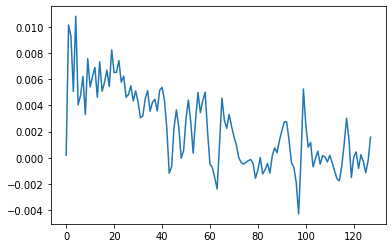

In [12]:
#cek info dataframe
df.info()

#buat plot
print("Plot:")
df.iloc[0].plot();

In [13]:
#angka2 dibawah ini didapat setelah memerika file
T = 128
Ntrain = 7352
Ntest = 2947
D = 9 # => 9 file
K = 6 # => angka untuk class (1-6)

#buat fungsi
def load_data():
  # Returns:
  # Xtrain (Ntrain x T x D), Ytrain (Ntrain)
  # Xtest (Ntest x T x D), Ytest (Ntest)

  Xtrain = np.zeros((Ntrain, T, D))
  Xtest = np.zeros((Ntest, T, D))

  #data training
  ts_filenames = [
    'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
    'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
    'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtrain[:, :, d] = x
  
  #label training
  Ytrain = pd.read_csv(
      f'{ts_file_prefix}y_train.txt', header=None).to_numpy() - 1
  Ytrain = Ytrain.flatten()

  #data testing
  ts_filenames = [
    'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtest[:, :, d] = x
  
  #label testing
  Ytest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
  Ytest = Ytest.flatten()

  return Xtrain, Ytrain, Xtest, Ytest

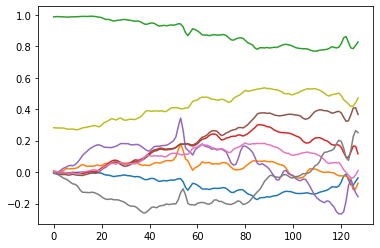

In [14]:
#tes fungsi di atas
Xtrain, Ytrain, Xtest, Ytest = load_data()

#buat plot (plot semua D=9, timeseries dengan panjang T=128)
plt.plot(Xtrain[7000, :, :]);

In [15]:
#ANN
inputs = []
features = []

#buat neural network untuk setiap jaringan time series D
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

#output gabungan akan menjadi D * (ukuran output JST individu)
x = Concatenate()(features)
x = Dense(K)(x)
model = Model(inputs, x)

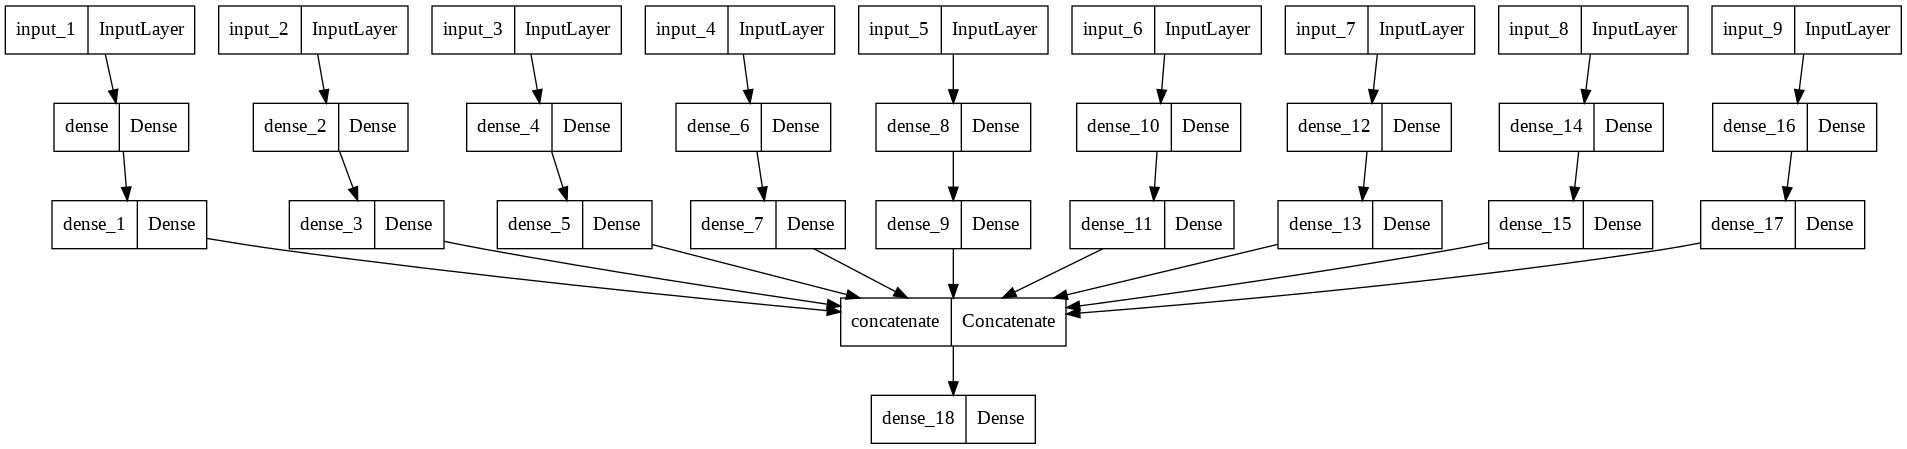

In [16]:
tf.keras.utils.plot_model(model)

In [17]:
#buat variable cek point
check_point = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

#buat compiler
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

#buat variable array
Xtrain_split = []
Xtest_split = []

#buat perulangan
for d in range(D):
  Xtrain_split.append(Xtrain[:, :, d])
  Xtest_split.append(Xtest[:, :, d])

#buat fit model
r = model.fit(
  Xtrain_split,
  Ytrain,
  epochs=15,
  callbacks=[check_point],
  validation_data=(Xtest_split, Ytest),
)

Epoch 1/15
230/230 [==============================] - 3s 8ms/step - loss: 0.6419 - accuracy: 0.7765 - val_loss: 0.4370 - val_accuracy: 0.8351
Epoch 2/15
230/230 [==============================] - 1s 6ms/step - loss: 0.2296 - accuracy: 0.9203 - val_loss: 0.3370 - val_accuracy: 0.8761
Epoch 3/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1648 - accuracy: 0.9411 - val_loss: 0.3022 - val_accuracy: 0.8856
Epoch 4/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1388 - accuracy: 0.9464 - val_loss: 0.2917 - val_accuracy: 0.9057
Epoch 5/15
230/230 [==============================] - 1s 6ms/step - loss: 0.1226 - accuracy: 0.9554 - val_loss: 0.2565 - val_accuracy: 0.9060
Epoch 6/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1103 - accuracy: 0.9608 - val_loss: 0.2669 - val_accuracy: 0.9033
Epoch 7/15
230/230 [==============================] - 1s 5ms/step - loss: 0.1023 - accuracy: 0.9642 - val_loss: 0.2685 - val_accuracy: 0.9138
Epoch 

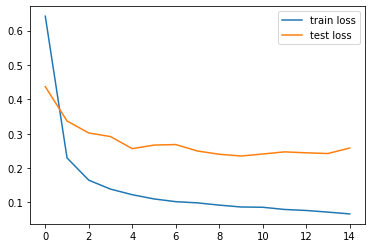

In [18]:
#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

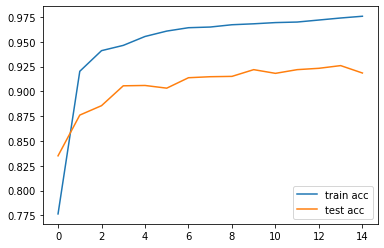

In [19]:
#buat plot
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [20]:
#buka model terbaik
best_model = tf.keras.models.load_model('best_model.h5')

#buat prediksi
Ptest = best_model.predict(Xtest_split)

#buat evaluasi
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9260264675941635

In [21]:
#Import
from sklearn.preprocessing import StandardScaler

#buat fungsi ke-2
def load_features():
  # Returns:
  # X_train (Ntrain x D)
  # X_test (Ntest x D)

  #data training
  df = pd.read_csv(
        'UCI HAR Dataset/train/X_train.txt',
        header=None,
        delim_whitespace=True)
  
  feat_train = df.to_numpy()

  #data testing
  df = pd.read_csv(
        'UCI HAR Dataset/test/X_test.txt',
        header=None,
        delim_whitespace=True)
  
  feat_test = df.to_numpy()

  #scaller
  scaler = StandardScaler()
  feat_train = scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train, feat_test

In [22]:
#tes fungsi ke-2
feat_train, feat_test = load_features()

In [23]:
D_feat = feat_train.shape[1]

Epoch 1/15
230/230 [==============================] - 1s 3ms/step - loss: 0.3325 - accuracy: 0.8762 - val_loss: 0.1941 - val_accuracy: 0.9298
Epoch 2/15
230/230 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9630 - val_loss: 0.1534 - val_accuracy: 0.9386
Epoch 3/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0764 - accuracy: 0.9732 - val_loss: 0.1473 - val_accuracy: 0.9403
Epoch 4/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0602 - accuracy: 0.9781 - val_loss: 0.1635 - val_accuracy: 0.9393
Epoch 5/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.1521 - val_accuracy: 0.9433
Epoch 6/15
230/230 [==============================] - 1s 2ms/step - loss: 0.0406 - accuracy: 0.9875 - val_loss: 0.1507 - val_accuracy: 0.9467
Epoch 7/15
230/230 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.1908 - val_accuracy: 0.9389
Epoch 

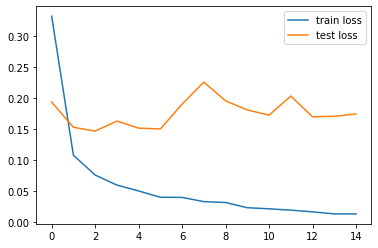

In [24]:
#buat model basic ANN
i = Input(shape=(D_feat,))
x = Dense(32, activation='relu')(i)
x = Dense(K)(x)
model = Model(i, x)

#buat compiler
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

#buat cekpoint
check_point2 = ModelCheckpoint('best_model_basic.h5', monitor='val_accuracy', save_best_only=True)

#buat fit model
r = model.fit(feat_train,Ytrain,epochs=15,callbacks=[check_point2],validation_data=(feat_test, Ytest))

#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

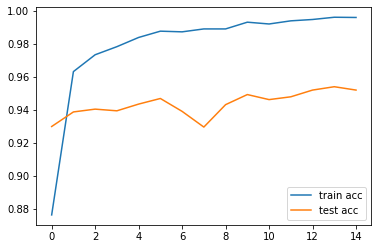

In [25]:
#buat plot
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [26]:
#load best model
best_model = tf.keras.models.load_model('best_model_basic.h5')

#buat prediksi
Ptest = best_model.predict(feat_test)

#evaluasi
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9538513742789277

# Logistic Regression

In [27]:
#import
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

#buatmodel
model = LogisticRegression(solver='liblinear')

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 0.9945593035908596
Score model untuk data testing: 0.9613165931455717


# SVC

In [28]:
#buatmodel
model = SVC()

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 0.9866702937976061
Score model untuk data testing: 0.9521547336274178


# Random Forest Classifier

In [29]:
#buatmodel
model = RandomForestClassifier()

#fit model
model.fit(feat_train, Ytrain)

#score model
print("Score model untuk data training:", model.score(feat_train, Ytrain))
print("Score model untuk data testing:", model.score(feat_test, Ytest))

Score model untuk data training: 1.0
Score model untuk data testing: 0.9304377332880895


# Combine Model

Epoch 1/15
230/230 [==============================] - 3s 9ms/step - loss: 0.2890 - accuracy: 0.9025 - val_loss: 0.2290 - val_accuracy: 0.9165
Epoch 2/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0924 - accuracy: 0.9701 - val_loss: 0.1768 - val_accuracy: 0.9399
Epoch 3/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0673 - accuracy: 0.9752 - val_loss: 0.1770 - val_accuracy: 0.9372
Epoch 4/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0558 - accuracy: 0.9792 - val_loss: 0.1880 - val_accuracy: 0.9389
Epoch 5/15
230/230 [==============================] - 2s 7ms/step - loss: 0.0495 - accuracy: 0.9811 - val_loss: 0.1492 - val_accuracy: 0.9518
Epoch 6/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0390 - accuracy: 0.9864 - val_loss: 0.1577 - val_accuracy: 0.9505
Epoch 7/15
230/230 [==============================] - 1s 6ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.1793 - val_accuracy: 0.9454
Epoch 

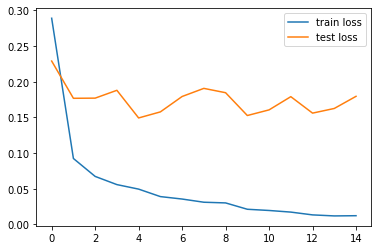

In [30]:
#buat variable array
inputs = []
features = []

#buat neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

i2 = Input(shape=(D_feat,))
x2 = Dense(32, activation='relu')(i2)

#output gabungan akan menjadi D * (ukuran dari output ANN individu)
x = Concatenate()(features + [x2])
x = Dense(K)(x)
model = Model(inputs + [i2], x)

#buat compiler
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

#buat cekpoint
check_point3 = ModelCheckpoint('best_model_combined.h5', monitor='val_accuracy', save_best_only=True)

#buat fit model
r = model.fit(Xtrain_split + [feat_train],Ytrain,epochs=15,callbacks=[check_point3],validation_data=(Xtest_split + [feat_test], Ytest))

#buat plot
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

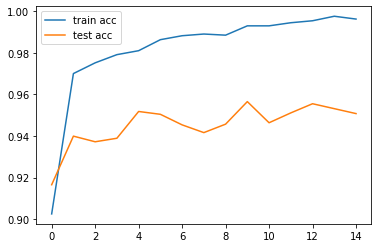

In [31]:
#buat plot
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [32]:
#load best model
best_model = tf.keras.models.load_model('best_model_combined.h5')

#buat prediksi
Ptest = best_model.predict(Xtest_split + [feat_test])

#evaluasi
np.mean(np.argmax(Ptest, axis=1) == Ytest)

0.9565659993213438